In [254]:
# Imports
import numpy as np
import pandas as pd
import scipy
import subprocess
from sklearn import metrics
import csv
import sklearn
import shap
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import DataGenerator, KneeLocator 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import TypedDict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance

# Check One hot encoded columns importance

In [256]:
#Using fullHot_episodes
fullHot_episodes = pd.read_csv('/home/kabank/workbench/.conda/analysis/kabank-data/new-data/fullHot_episodes.csv')
fullHot_episodes.fillna(0, inplace=True)
fullHot_episodes.columns

Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [257]:
fullHot_episodes['gender'] = fullHot_episodes['gender'].replace({'M': 0, 'F': 1, '0': 2})
fullHot_episodes['gender'].unique()

array([1, 0, 2])

In [258]:
fullHot_episodes['closingcode'] = fullHot_episodes['closingcode'].replace({'closingcode_1':1, 'closingcode_3':3, 'closingcode_5':5, 'closingcode_0':0,
       'closingcode_9':9, 'closingcode_2':2, 'closingcode_4':4, 'closingcode_6':6})
fullHot_episodes['closingcode'].unique()

array([1, 3, 5, 0, 9, 2, 4, 6])

In [259]:
fullHot_episodes['aftercode'] = fullHot_episodes['aftercode'].replace({'aftercode_1':1, 'aftercode_5':5, 'aftercode_3':3,
       'aftercode_2':2, 'aftercode_4':4})
fullHot_episodes['aftercode'].unique()

array([1, 5, 4, 2, 3])

In [260]:
episodes_df2 = fullHot_episodes.copy()
episodes_df2.drop(columns={'pasient', 'episode_id', 'episode_order', 'islast',
       'episode_start_date', 'episode_end_date', 'age_group', 'tillnextepisode', 'TNE_BO_180', 'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365',
       'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Cat_LOE', 'Cat_CV', 'Inpatient_ratio', 'Inpatient_day_ratio', 'gender','age', 'closingcode', 'aftercode',
       'age_group', 'remaining_time_countdown'
       }, inplace=True)

print(len(episodes_df2)) #19922
episodes_df2.columns

15372


Index(['num_diagnoses', 'num_medications', 'var_no_dates_permonth',
       'Length_of_Episode', 'Count_visit', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler',
       'Teenager'],
      dtype='object')

In [261]:
# Do PCA from basis
X = episodes_df2
y= fullHot_episodes['tillnextepisode']

# Standardizing the data in PCA to ensure that all features have the same scale:
X = StandardScaler().fit_transform(X)
X_mean = np.mean(X, axis=0)

# The covariance matrix is a square matrix representing the covariance between each pair of features:
#cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.00006506e+00  3.73542767e-01  2.34985142e-01  2.86735950e-01
   4.38545050e-01  7.25888080e-02 -9.96497292e-02  8.22024802e-02
  -8.64173017e-02 -2.94052708e-02  1.70304836e-01 -6.97013160e-02
  -2.77900391e-02  9.99256893e-02 -6.28400721e-02 -9.31271851e-02
   1.14407958e-01 -3.06881520e-02 -6.68254121e-03 -9.73213624e-02
  -9.15305506e-03  9.26536974e-02 -1.39721334e-02 -7.59087818e-02
   7.62152619e-03 -6.89571095e-03 -1.07815204e-02  1.13470691e-02
   2.40189170e-02 -1.17775785e-01  5.13165459e-02]
 [ 3.73542767e-01  1.00006506e+00  2.52160787e-01  1.91087017e-01
   4.90708507e-01 -1.37950763e-02  2.68549375e-02  6.69058545e-04
  -1.57605396e-02 -4.77132098e-03  1.11702308e-01 -2.15223566e-02
  -1.27636667e-02  4.38347950e-02 -1.96602307e-02 -5.70590850e-02
   6.44816734e-02 -1.26579668e-02 -1.72758421e-02 -4.72779822e-02
   1.11214761e-01  4.82818158e-02 -3.06832126e-02 -1.24211206e-01
  -4.30454798e-02 -1.42844734e-02 -1.69682818e-02  1.81407233e-02
   3.

In [262]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
   print(i[0])

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp
# In the array bellow we see that the first feature explains roughly 9.6% of the variance within our data set 
# to have the 95% of the variance we need to have the first 24 features

Eigenvalues in descending order:
2.9017702796863203
2.628013950820758
2.1384998190297257
1.8416420527153639
1.7430147594361338
1.4567664538719374
1.4458052455579475
1.3258864155879309
1.2708593424323944
1.1490638271407765
1.102635441795752
1.072861988890006
1.0552535806906658
1.0333032973539915
0.9971905326738412
0.9788019548221316
0.9649341493724003
0.9278654742570497
0.8833457859744239
0.8362965537315775
0.7555732672055863
0.7090253162753379
0.57829121126377
0.569910891642069
0.3287203310452476
0.30292093788289864
0.0037639236985635696
2.6547777161504524e-15
1.5993303537844709e-15
1.292328913012037e-15
5.7223156675395565e-16


array([  9.35994035,  17.83685322,  24.73479097,  30.67518532,
        36.29744781,  40.99638873,  45.65997322,  49.93674794,
        54.03602751,  57.74244389,  61.29910102,  64.75972101,
        68.16354337,  71.49656298,  74.71309737,  77.87031763,
        80.98280594,  83.97572567,  86.82504283,  89.52259815,
        91.95977272,  94.24680237,  96.11213653,  97.95043917,
        99.01075835,  99.9878591 , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

In [263]:
#Principal Component Analysis (PCA):
#Transform the data into a lower-dimensional space while retaining as much information as possible. 
# The first few principal components often capture most of the variance.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# optional but recommended for PCA to do data standardization
scaler = StandardScaler() #  to ensure that each feature has zero mean and unit variance.
episodes_scaled = scaler.fit_transform(episodes_df2)

# Apply PCA to reduce dimensionality while retaining most of the variance
# We may need to experiment with different values of n_components to find the right balance between dimensionality reduction and information retention.
n_components = 31  # Number of components 
pca = PCA(n_components=n_components)
episodes_pca = pca.fit_transform(episodes_scaled)

# episodes_pca now contains the transformed data with reduced dimensionality

# Explained variance ratio to see how much variance is retained
# Help us to understand how well the reduced-dimensional representation captures the variability in the original data.
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# To use the transformed data for clustering or prediction tasks, we can use episodes_pca
#ratio of the total variance in the original data
#Understanding the explained variance ratio is important because it helps you determine how many principal components to retain.
#  You generally want to retain enough components to capture a high percentage of the total variance, while reducing the dimensionality of the data.

Explained Variance Ratio: [9.35994035e-02 8.47691287e-02 6.89793775e-02 5.94039435e-02
 5.62226249e-02 4.69894092e-02 4.66358449e-02 4.27677472e-02
 4.09927958e-02 3.70641638e-02 3.55665713e-02 3.46061999e-02
 3.40382236e-02 3.33301960e-02 3.21653439e-02 3.15722026e-02
 3.11248831e-02 2.99291972e-02 2.84931717e-02 2.69755532e-02
 2.43717456e-02 2.28702965e-02 1.86533417e-02 1.83830264e-02
 1.06031918e-02 9.77100748e-03 1.21408995e-04 1.84592276e-32
 2.43873799e-33 2.00809355e-33 1.93358995e-33]


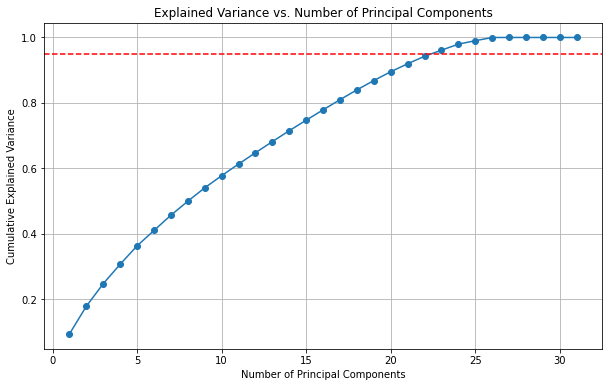

In [264]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
                                
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
#We want to pick the smallest k so that k-dimensional space gives you %95 variance.
# Optionally, draw a horizontal line at a specific threshold (e.g., 0.95 for 95% variance)
plt.axhline(y=0.95, color='r', linestyle='--')

# Show the plot
plt.show()


In [265]:
#Principal Component Analysis (PCA):
#Transform the data into a lower-dimensional space while retaining as much information as possible. 
# The first few principal components often capture most of the variance.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# optional but recommended for PCA to do data standardization
scaler = StandardScaler() #  to ensure that each feature has zero mean and unit variance.
episodes_scaled = scaler.fit_transform(episodes_df2)

# Apply PCA to reduce dimensionality while retaining most of the variance
# We may need to experiment with different values of n_components to find the right balance between dimensionality reduction and information retention.
n_components = 23  # Number of components to keep
pca = PCA(n_components=n_components)
episodes_pca = pca.fit_transform(episodes_scaled)

# episodes_pca now contains the transformed data with reduced dimensionality

# Explained variance ratio to see how much variance is retained
# Help us to understand how well the reduced-dimensional representation captures the variability in the original data.
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# To use the transformed data for clustering or prediction tasks, we can use episodes_pca
#ratio of the total variance in the original data
#Understanding the explained variance ratio is important because it helps you determine how many principal components to retain.
#  You generally want to retain enough components to capture a high percentage of the total variance, while reducing the dimensionality of the data.

Explained Variance Ratio: [0.0935994  0.08476913 0.06897938 0.05940394 0.05622262 0.04698941
 0.04663584 0.04276775 0.0409928  0.03706416 0.03556657 0.0346062
 0.03403822 0.0333302  0.03216534 0.0315722  0.03112488 0.0299292
 0.02849317 0.02697555 0.02437175 0.0228703  0.01865334]


In [266]:
# Assuming pca is your PCA object after fitting
# the loadings, represent the weights of the original features in each principal component.
loadings = pca.components_

# Each row of 'loadings' corresponds to a principal component
# Each column corresponds to an original feature

# To get the most important features for the first principal component:
top_features_first_component = loadings[0]

# You can sort the features by their absolute values to see the most influential ones
sorted_features_indices = abs(top_features_first_component).argsort()[::-1]
top_features_names = episodes_df2.columns[sorted_features_indices]

print(f'Top features for first principal component: {top_features_names}')
# they are sorted based on their importance (loadings) in the first principal component: the most influential features

Top features for first principal component: Index(['Teenager', 'F', 'M', 'MiddleChildhood', 'Inpatient_daynight_ratio',
       'closingcode_1', 'Therapy_ratio', 'closingcode_4', 'aftercode_1',
       'aftercode_2', 'Outpatient_ratio', 'Examination_ratio', 'Count_visit',
       'num_diagnoses', 'var_no_dates_permonth', 'closingcode_2',
       'aftercode_5', 'Preschooler', 'TreatmentPlanning_ratio',
       'num_medications', 'closingcode_5', 'closingcode_3', 'closingcode_0',
       'Care_intensity', 'aftercode_4', 'Advisory_ratio', 'aftercode_3',
       'closingcode_9', 'Length_of_Episode', 'closingcode_6', 'gender_0'],
      dtype='object')


# Check columns importance in final_episodes

In [267]:
#load the data
final_episodes = pd.read_csv("/home/kabank/workbench/.conda/analysis/kabank-data/new-data/final_episodes.csv")

In [268]:
final_episodes.dropna()
print(len(final_episodes))
final_episodes.columns

17125


Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group', 'num_diagnoses', 'num_medications'],
      dtype='object')

In [269]:
#Using final_episodes and applying PCA for feature reduction
episodes_df = final_episodes.copy()
episodes_df.fillna(0, inplace=True)

episodes_df.drop(columns={'pasient', 'episode_id', 'episode_order', 'islast',
       'episode_start_date', 'episode_end_date', 'age_group', 'tillnextepisode', 'TNE_BO_180', 'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365',
       'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Cat_LOE', 'Cat_CV', 'Inpatient_ratio', 'Inpatient_day_ratio', 'remaining_time_countdown'
       }, inplace=True)

episodes_df.columns

Index(['age', 'var_no_dates_permonth', 'gender', 'closingcode', 'aftercode',
       'Length_of_Episode', 'Count_visit', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'num_diagnoses', 'num_medications'],
      dtype='object')

In [270]:
# Do PCA from basis
X = episodes_df
y= final_episodes['tillnextepisode']

# Standardizing the data in PCA to ensure that all features have the same scale:
X = StandardScaler().fit_transform(X)
X_mean = np.mean(X, axis=0)

# The covariance matrix is a square matrix representing the covariance between each pair of features:
#cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.00005840e+00  8.67918713e-02  1.93300163e-01  6.96086784e-02
   2.21704026e-02 -1.00539171e-01 -1.56196897e-03 -6.64421633e-03
   5.05116181e-02 -2.10995289e-02 -4.16296749e-02 -1.23711257e-01
   1.61995136e-01  7.89296552e-03  8.74004431e-02  4.32672503e-02]
 [ 8.67918713e-02  1.00005840e+00  1.58580539e-02 -4.41595802e-02
  -1.02818025e-01  1.79833335e-02  3.68616082e-01  2.17087847e-02
   9.98914258e-03  3.63816392e-03 -5.64443478e-02  2.09360135e-02
   8.21573026e-02 -3.58477558e-01  2.52684380e-01  2.44735181e-01]
 [ 1.93300163e-01  1.58580539e-02  1.00005840e+00  3.33130197e-02
   9.12147602e-02 -9.26679819e-02 -7.94985776e-03  1.58760553e-01
  -9.03504301e-02 -8.27282273e-02 -5.41521575e-02 -5.02547303e-02
   7.52837363e-02  5.22463318e-02 -1.13528518e-02 -2.02489344e-02]
 [ 6.96086784e-02 -4.41595802e-02  3.33130197e-02  1.00005840e+00
   3.33907101e-02  6.75305877e-04  6.18157129e-03 -2.06811296e-02
   4.06811739e-03 -3.82298797e-02  8.16454786e-02 -5.

In [271]:
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)


# Normalize eigenvalues
normalized_eigenvalues = eig_vals / np.sum(eig_vals)

# Order features by normalized eigenvalues
ordered_features = np.argsort(normalized_eigenvalues)[::-1]

# Print normalized eigenvalues and ordered features
print("Normalized Eigenvalues:", normalized_eigenvalues)
print("Ordered Features:", ordered_features)


Normalized Eigenvalues: [ 9.35994035e-02  8.47691287e-02  6.89793775e-02  5.94039435e-02
  5.62226249e-02  1.21408995e-04  9.77100748e-03  1.06031918e-02
  4.69894092e-02  4.66358449e-02  1.86533417e-02  1.83830264e-02
  4.27677472e-02  4.09927958e-02  2.28702965e-02  2.43717456e-02
  2.69755532e-02  3.70641638e-02  2.84931717e-02  3.55665713e-02
  2.99291972e-02  3.46061999e-02  3.40382236e-02  3.33301960e-02
  3.21653439e-02  3.15722026e-02  3.11248831e-02  5.15879455e-17
 -8.56324198e-17 -4.16853175e-17 -1.84578820e-17]
Ordered Features: [ 0  1  2  3  4  8  9 12 13 17 19 21 22 23 24 25 26 20 18 16 15 14 10 11
  7  6  5 27 30 29 28]


In [272]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
   print(i[0])

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp
# In the array bellow we see that the first feature explains roughly 9.6% of the variance within our data set 
# to have the 95% of the variance we need to have the first 24 features

Eigenvalues in descending order:
2.518604487383266
1.9023735579142855
1.7763031015586686
1.3183847713630343
1.1545833975969604
1.0846737077731279
1.0380947030359227
0.9820215866634138
0.8842385352570346
0.8189506424019253
0.7773763676140866
0.5833911239874896
0.5436932088132199
0.31251051624728027
0.3023245333380871
0.0034101201827749063


array([ 15.74035885,  27.62949929,  38.73074539,  46.97016905,
        54.1858939 ,  60.96470871,  67.45242173,  73.58969825,
        79.11586638,  84.23400901,  89.09232759,  92.7383092 ,
        96.13619333,  98.08927   ,  99.97868799, 100.        ])

In [273]:
#Principal Component Analysis (PCA):
#Transform the data into a lower-dimensional space while retaining as much information as possible. 
# The first few principal components often capture most of the variance.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# optional but recommended for PCA to do data standardization
scaler = StandardScaler() #  to ensure that each feature has zero mean and unit variance.
episodes_scaled = scaler.fit_transform(episodes_df)

# Apply PCA to reduce dimensionality while retaining most of the variance
# We may need to experiment with different values of n_components to find the right balance between dimensionality reduction and information retention.
n_components = 16  # Number of components 
pca = PCA(n_components=n_components)
episodes_pca = pca.fit_transform(episodes_scaled)

# episodes_pca now contains the transformed data with reduced dimensionality

# Explained variance ratio to see how much variance is retained
# Help us to understand how well the reduced-dimensional representation captures the variability in the original data.
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# To use the transformed data for clustering or prediction tasks, we can use episodes_pca
#ratio of the total variance in the original data
#Understanding the explained variance ratio is important because it helps you determine how many principal components to retain.
#  You generally want to retain enough components to capture a high percentage of the total variance, while reducing the dimensionality of the data.

Explained Variance Ratio: [0.15740359 0.1188914  0.11101246 0.08239424 0.07215725 0.06778815
 0.06487713 0.06137277 0.05526168 0.05118143 0.04858319 0.03645982
 0.03397884 0.01953077 0.01889418 0.00021312]


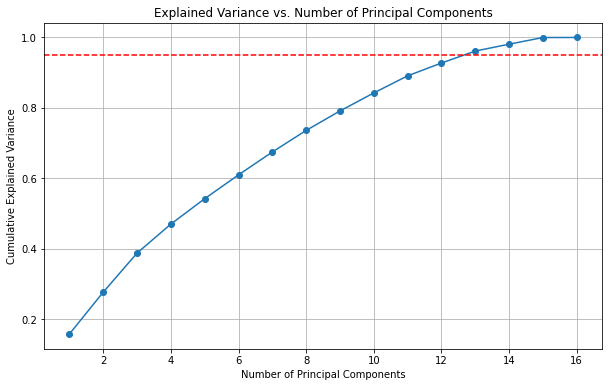

In [274]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
                                
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
#We want to pick the smallest k so that k-dimensional space gives you %95 variance.
# Optionally, draw a horizontal line at a specific threshold (e.g., 0.95 for 95% variance)
plt.axhline(y=0.95, color='r', linestyle='--')

# Show the plot
plt.show()


In [275]:
#Principal Component Analysis (PCA):
#Transform the data into a lower-dimensional space while retaining as much information as possible. 
# The first few principal components often capture most of the variance.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# optional but recommended for PCA to do data standardization
scaler = StandardScaler() #  to ensure that each feature has zero mean and unit variance.
episodes_scaled = scaler.fit_transform(episodes_df)

# Apply PCA to reduce dimensionality while retaining most of the variance
# We may need to experiment with different values of n_components to find the right balance between dimensionality reduction and information retention.
n_components = 13  # Number of components to keep
pca = PCA(n_components=n_components)
episodes_pca = pca.fit_transform(episodes_scaled)

# episodes_pca now contains the transformed data with reduced dimensionality

# Explained variance ratio to see how much variance is retained
# Help us to understand how well the reduced-dimensional representation captures the variability in the original data.
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# To use the transformed data for clustering or prediction tasks, we can use episodes_pca
#ratio of the total variance in the original data
#Understanding the explained variance ratio is important because it helps you determine how many principal components to retain.
#  You generally want to retain enough components to capture a high percentage of the total variance, while reducing the dimensionality of the data.

Explained Variance Ratio: [0.15740359 0.1188914  0.11101246 0.08239424 0.07215725 0.06778815
 0.06487713 0.06137277 0.05526168 0.05118143 0.04858319 0.03645982
 0.03397884]


In [276]:
# Assuming pca is your PCA object after fitting
# the loadings, represent the weights of the original features in each principal component.
loadings = pca.components_

# Each row of 'loadings' corresponds to a principal component
# Each column corresponds to an original feature

# To get the most important features for the first principal component:
top_features_first_component = loadings[0]

# You can sort the features by their absolute values to see the most influential ones
sorted_features_indices = abs(top_features_first_component).argsort()[::-1]
top_features_names = episodes_df.columns[sorted_features_indices]

print(f'Top features for first principal component: {top_features_names}')
# they are sorted based on their importance (loadings) in the first principal component: the most influential features

Top features for first principal component: Index(['Count_visit', 'num_diagnoses', 'num_medications', 'Length_of_Episode',
       'var_no_dates_permonth', 'Inpatient_daynight_ratio', 'Outpatient_ratio',
       'TreatmentPlanning_ratio', 'Therapy_ratio', 'Examination_ratio',
       'Care_intensity', 'age', 'Advisory_ratio', 'aftercode', 'closingcode',
       'gender'],
      dtype='object')


Include these: 'Count_visit', 'num_diagnoses', 'num_medications', 'Length_of_Episode', 'var_no_dates_permonth','Inpatient_daynight_ratio', 'Inpatient_daynight_ratio', 
'TreatmentPlanning_ratio', 'Therapy_ratio','Examination_ratio','Care_intensity','age', 'Advisory_ratio'

and not include: 'aftercode', 'closingcode','gender'

# Correlation Analysis

# Tree-Based Models Feature Importance:
Train a tree-based model (e.g., Random Forest, Gradient Boosting) and use the built-in feature importance attribute.

In [277]:
X = episodes_df
y= final_episodes['tillnextepisode']

# Remove rows with NaN in the target variable
X = X[~y.isna()]
y = y.dropna()

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance


age                         0.204088
Length_of_Episode           0.117951
Examination_ratio           0.084606
Therapy_ratio               0.083321
TreatmentPlanning_ratio     0.082953
Count_visit                 0.082223
var_no_dates_permonth       0.080348
Care_intensity              0.075627
Advisory_ratio              0.072843
aftercode                   0.025542
closingcode                 0.022245
num_diagnoses               0.020080
Outpatient_ratio            0.019631
gender                      0.016053
Inpatient_daynight_ratio    0.009212
num_medications             0.003276
dtype: float64

# SelectKBest and Feature Importance:
Use statistical tests (e.g., ANOVA, chi-squared) to select the top k features.

In [278]:
selector = SelectKBest(f_classif, k='all')
# X_new, only includes the ‘k’ best features.
X_new = selector.fit_transform(X, y)
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
feature_scores


age                         2.018614
Care_intensity              1.790413
Advisory_ratio              1.492355
Outpatient_ratio            1.421553
Inpatient_daynight_ratio    1.321589
Therapy_ratio               1.248679
closingcode                 1.093547
var_no_dates_permonth       1.088540
gender                      1.085581
TreatmentPlanning_ratio     1.085098
Examination_ratio           1.040412
aftercode                   1.007891
Length_of_Episode           0.992132
num_diagnoses               0.774966
Count_visit                 0.761088
num_medications             0.631575
dtype: float64

# Permutation Feature Importance:
Randomly shuffle values of a single feature and measure the impact on the model's performance.

In [279]:
result = permutation_importance(model, X, y, n_repeats=10, random_state=0)
perm_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
perm_importance


age                         0.916531
Length_of_Episode           0.357176
TreatmentPlanning_ratio     0.202183
Count_visit                 0.182355
var_no_dates_permonth       0.144109
Examination_ratio           0.139680
Therapy_ratio               0.136094
Care_intensity              0.121459
Advisory_ratio              0.114223
Outpatient_ratio            0.049142
gender                      0.048586
aftercode                   0.041533
closingcode                 0.033389
num_diagnoses               0.029798
Inpatient_daynight_ratio    0.017260
num_medications             0.004302
dtype: float64

# Shapley values for feature selection
contribution of each feature in a model’s prediction.
it helps interpret which features have a high influence on the prediction

In [280]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# print model coefficients - It then prints the coefficients learned for each feature, which tell us how much the model output changes when we change each of the input features
print("Model coefficients:\\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))


Model coefficients:\n
age = -80.54065
var_no_dates_permonth = 7.40764
gender = 44.90279
closingcode = 7.2006
aftercode = -6.64187
Length_of_Episode = -0.23944
Count_visit = 0.01824
Therapy_ratio = -9389.58201
Examination_ratio = -9324.62
Advisory_ratio = -9308.61585
TreatmentPlanning_ratio = -9660.74205
Outpatient_ratio = -157.35836
Inpatient_daynight_ratio = -139.48581
Care_intensity = -31.01801
num_diagnoses = -7.89456
num_medications = -68.49858


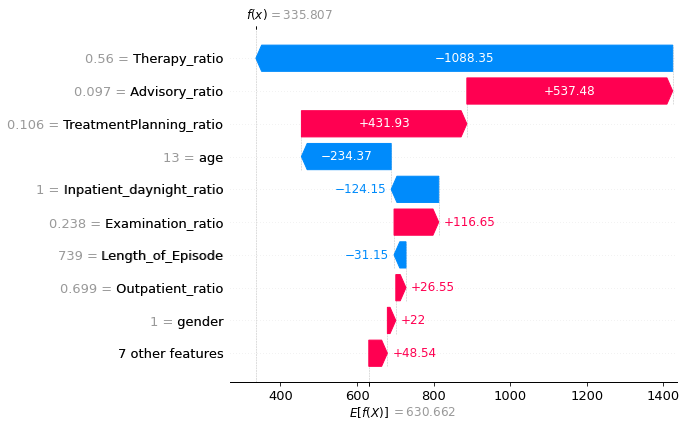

<Figure size 432x288 with 0 Axes>

In [281]:
# explain all the predictions in the test set
explainer = shap.Explainer(model, X100)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
# get the current figure
fig = plt.gcf()

# change the color of all text elements to white
for text in fig.findobj(plt.Text):
    text.set_color('white')

# show the plot
plt.show()


The interpretation of feature importance is not always straightforward, and it often requires a combination of statistical analysis, domain expertise, and practical experimentation.
Based on the approcahes we considered: 

Shapley Values:
Positive values indicate a positive impact on the target variable, and negative values indicate a negative impact.
In your case, 'gender' has the highest positive impact, while 'Therapy_ratio' and 'Examination_ratio' have the highest negative impact.

Permutation Feature Importance:
Features with higher values are considered more important.
'age,' 'Length_of_Episode,' and 'TreatmentPlanning_ratio' are considered more important according to permutation importance.

SelectKBest:
Features with higher scores are considered more important.
'age,' 'Care_intensity,' and 'Advisory_ratio' have higher scores according to SelectKBest.

RandomForestRegressor:
Features with higher values are considered more important.
'age,' 'Length_of_Episode,' and 'var_no_dates_permonth' are considered more important according to the RandomForestRegressor.

PCA:
We can use the proportion of explained variance as a measure of importance. Higher proportions indicate more important features.
Based on the eigenvalues, it appears that the first few components contribute significantly to the variance: {'Count_visit', 'num_diagnoses', 'num_medications', 'Length_of_Episode',
'var_no_dates_permonth', 'Inpatient_daynight_ratio', 'Outpatient_ratio'}. It also gives us this insight that 13 variables {'Count_visit', 'num_diagnoses', 'num_medications', 'Length_of_Episode', 'var_no_dates_permonth','Inpatient_daynight_ratio', 'Inpatient_daynight_ratio', 
'TreatmentPlanning_ratio', 'Therapy_ratio','Examination_ratio','Care_intensity','age', 'Advisory_ratio'} will capture a high percentage (95%) of the total variance of data without considering these: {'aftercode', 'closingcode','gender'}
